<a href="https://colab.research.google.com/github/linj6669/F-backup/blob/master/Learn_scikitlearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Chapter 1 - Data Pre-processing
# Review the data shape and quality

In [ ]:
#play with iris dataset
import seaborn as sns
iris = sns.load_dataset('iris')
x=iris.drop('species',axis=1)
x.head(10)
x.shape
y=iris['species']
y.head(10)
y.shape

(150,)

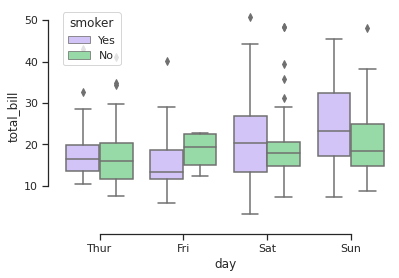

In [ ]:
#Boxplot
import seaborn as sns
sns.set_theme(style="ticks", palette="pastel")

# Load the example tips dataset
tips = sns.load_dataset("tips")

# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="day", y="total_bill",
            hue="smoker", palette=["m", "g"],
            data=tips)
sns.despine(offset=10, trim=True)

In [ ]:
import seaborn as sns
titanic=sns.load_dataset('titanic')
age=titanic['age']
age.head(10)

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: age, dtype: float64

In [ ]:
age.shape
age.isnull().sum() ##count number of rows that is null (NaN)

177

In [ ]:
mean=age.mean()
mean_round=round(mean)
print(mean_round)
age.fillna(mean_round, inplace=True) ###Fill NaN with mean(average)
age.head(10)

30


0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5    30.0
6    54.0
7     2.0
8    27.0
9    14.0
Name: age, dtype: float64

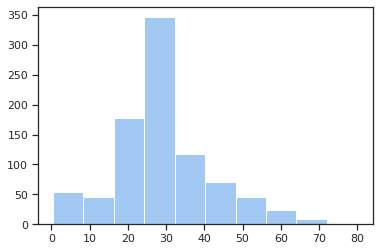

In [ ]:
import matplotlib.pyplot as plt
plt.hist(age)
plt.show()

In [ ]:
min_val=age.mean() - (3 * age.std())
max_val = age.mean() + (3 * age.std())
min_val
max_val

68.76659900835168

In [ ]:
outliers=age[age > max_val]
outliers.count()
outliers

96     71.0
116    70.5
493    71.0
630    80.0
672    70.0
745    70.0
851    74.0
Name: age, dtype: float64

In [ ]:
age=age[age <= max_val]
age.shape

(884,)

# Feature Engineering over Categorical Feature

In [ ]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
em_town=titanic['embark_town']
em_town.head(10)

0    Southampton
1      Cherbourg
2    Southampton
3    Southampton
4    Southampton
5     Queenstown
6    Southampton
7    Southampton
8    Southampton
9      Cherbourg
Name: embark_town, dtype: object

In [ ]:
enc=LabelEncoder()
new_label=pd.Series(enc.fit_transform(em_town.astype('str'))) ##Encode text to numeric
new_label.head(10)

0    2
1    0
2    2
3    2
4    2
5    1
6    2
7    2
8    2
9    0
dtype: int64

#Rescale the data: 
*   Data normalization (0-1)
*   Data standarization (transform data into Gaussian distribution - mean = 0, std = 1)

In [ ]:
##Normallization
age_normalized=(age-age.min())/(age.max()-age.min())
age_normalized.head(10)

0    0.329064
1    0.573041
2    0.390058
3    0.527295
4    0.527295
5    0.451052
6    0.817017
7    0.024093
8    0.405306
9    0.207075
Name: age, dtype: float64

In [ ]:
###Standarization
age_standardized=(age-age.mean())/age.std()
age_standardized.head(10)

0   -0.594548
1    0.687225
2   -0.274105
3    0.446892
4    0.446892
5    0.046338
6    1.968998
7   -2.196765
8   -0.193994
9   -1.235435
Name: age, dtype: float64

## Chapter 2: Introduction to Scikit_learn
*   Estimator
*   Predictor
*   Transformer


# 1. Unsupervised learning
Clustering type: 

1.   Connectivity-based models
2.   Density-based models
3. Distribution-based model
4. Centroid-based models

Exercise dataset: http://archive.ics.uci.edu/ml/datasets/Wholesale+customers

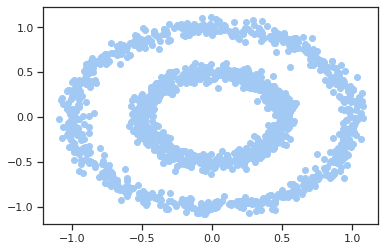

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0)

from sklearn import datasets
n_samples=1500
data=datasets.make_circles(n_samples=n_samples,factor=.5, noise=.05)[0]
plt.scatter(data[:,0],data[:,1])
plt.show()

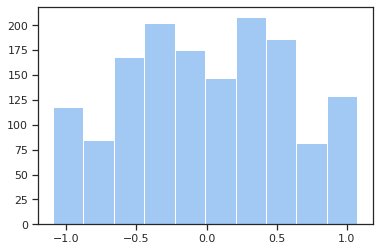

In [ ]:
plt.hist(data[:,0])
plt.show()

K-means
*   Initialization
*   Assignment step
*   Update step







[[  1.         940.18090321]
 [  2.         595.64179692]
 [  3.         361.19577702]
 [  4.         255.38666529]
 [  5.         200.61129975]
 [  6.         169.98216742]
 [  7.         151.10582343]
 [  8.         134.92374048]
 [  9.         117.28206963]
 [ 10.         102.45051762]
 [ 11.          86.5764032 ]
 [ 12.          74.91629722]
 [ 13.          63.04941468]
 [ 14.          55.43528258]
 [ 15.          48.67398558]
 [ 16.          44.09884755]
 [ 17.          39.50629978]
 [ 18.          35.2500282 ]
 [ 19.          32.34632296]
 [ 20.          29.51419216]]


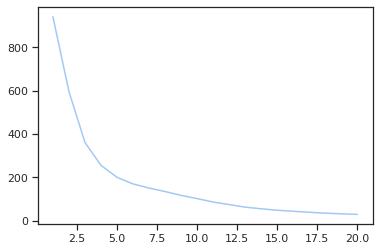

In [ ]:
from sklearn.cluster import KMeans
ideal_k=[]
for i in range(1,21):
  est_kmeans=KMeans(n_clusters=i)
  est_kmeans.fit(data)

  ideal_k.append([i,est_kmeans.inertia_])

ideal_k=np.array(ideal_k)
print(ideal_k)
plt.plot(ideal_k[:,0],ideal_k[:,1])
plt.show()

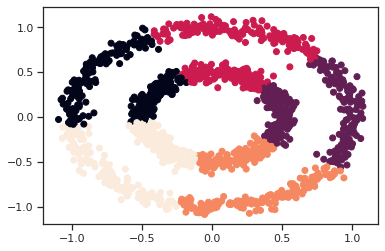

In [ ]:
est_kmeans=KMeans(n_clusters=5)
est_kmeans.fit(data)
pred_kmeans=est_kmeans.predict(data)

plt.scatter(data[:,0],data[:,1], c=pred_kmeans) ##c:color by prediction group
plt.show()